In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pesmodsplitdataset/val/labels/frame2896.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame0587.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame2852.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame0801.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame1025.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame0699.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame0829.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame2427.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame2614.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame1468.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame0978.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame1014.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame2953.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame3535.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame2810.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame0390.txt
/kaggle/input/pesmodsplitdataset/val/labels/frame2803.txt
/kaggle/input/

In [2]:
# !pip install ultralytics

In [3]:
from ultralytics import YOLO

print("Ultralytics YOLOv8 imported successfully!")

ModuleNotFoundError: No module named 'ultralytics'

# yolov8n

In [ ]:
model = YOLO('yolov8n.pt')

In [ ]:
results = model.predict(source='/kaggle/input/pesmodsplitdataset/test/images/frame0009.jpg', conf=0.5)

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
for result in results:
    # Show the detected objects on the image
    result.show()  # Displays the image with detections
    
    # Alternatively, you can save the results if needed
    result.save(filename='result_frame0009.jpg')  # Save the result image with detections

    # To display using matplotlib (if you prefer):
    img_with_detections = cv2.imread(result.path)  # Read the image again
    plt.imshow(cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(f"Detected Objects: {len(result.boxes)}")  # Title with count of detected objects
    plt.show()  # Show the image with detections


# yolov11n

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

In [ ]:
results = model.predict(source='/kaggle/input/pesmodsplitdataset/test/images/frame0009.jpg', conf=0.5)

In [ ]:
for result in results:
    # Show the detected objects on the image
    result.show()  # Displays the image with detections
    
    # Alternatively, you can save the results if needed
#     result.save(filename='result_frame0009.jpg')  # Save the result image with detections

    # To display using matplotlib (if you prefer):
    img_with_detections = cv2.imread(result.path)  # Read the image again
    plt.imshow(cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(f"Detected Objects: {len(result.boxes)}")  # Title with count of detected objects
    plt.show()  # Show the image with detections

# RT-DETR

In [ ]:
from ultralytics import RTDETR

# Load a COCO-pretrained RT-DETR-l model
model = RTDETR("rtdetr-l.pt")

# Display model information (optional)
model.info()

In [ ]:
results = model("/kaggle/input/pesmodsplitdataset/test/images/frame0009.jpg")

In [ ]:
from ultralytics import RTDETR
import cv2
import matplotlib.pyplot as plt

In [ ]:
image_path = "/kaggle/input/pesmodsplitdataset/test/images/frame0028.jpg"  # Update with the correct path to your image

In [58]:
# Check if the image file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Error: The image file at {image_path} does not exist.")

# Run inference with the RT-DETR-l model on the image
results = model(image_path)  # Run the model on the image


image 1/1 /kaggle/input/pesmodsplitdataset/test/images/frame0028.jpg: 640x640 4 cars, 1433.2ms
Speed: 4.3ms preprocess, 1433.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


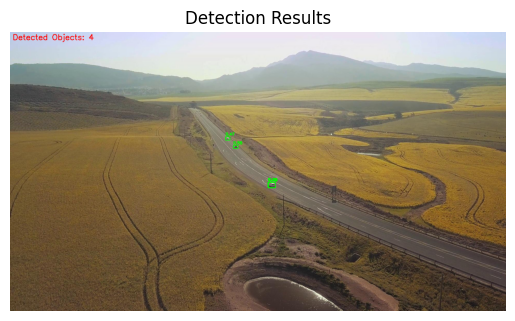

In [59]:
# Check the number of results and process the first one (assuming it's a single image)
for result in results:
    # Extract results from the first (and only) result
    boxes = result.boxes  # Get bounding box results

    # Read the original image
    image = cv2.imread(image_path)  # Read the image again
    if image is None:
        raise ValueError(f"Error: Image could not be read from {image_path}. Please check the file path.")

    # Get the number of detections
    num_detections = len(boxes.xyxy)  # Count the number of detected boxes

    # Loop over the boxes and draw them on the image
    for box, prob in zip(boxes.xyxy, boxes.conf):  # Loop through bounding boxes and their confidence scores
        x1, y1, x2, y2 = map(int, box)  # Get bounding box coordinates
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle
        cv2.putText(image, f"{prob:.2f}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Put confidence score

    # Convert image from BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the count of detected objects on the image
    cv2.putText(image_rgb, f"Detected Objects: {num_detections}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the image with detection boxes and count using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title("Detection Results")
    plt.show()
